---
title: "NBA"
author: "Byeong-Hak Choe"
date: "2024-02-15"  #  Use the format YYYY-MM-DD
categories: [python, data-analysis, nba]
image: "image.jpeg"
---

<a href="https://colab.research.google.com/github/bcdanl/posts/blob/main/nba/nba.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Preliminary Exploration

First, we loaded the NBA dataset and observed its structure. The dataset contains five columns: `Name`, `Team`, `Position`, `Birthday`, and `Salary`. This gives us a good starting point to explore various aspects of the data, such as salary distributions among teams, age distribution of players, and more.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from itables import init_notebook_mode
from itables import show

nba = pd.read_csv("https://bcdanl.github.io/data/nba.csv")
show(nba)

Let's start with checking out types of variables and missing values.

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      450 non-null    object 
 1   Team      450 non-null    object 
 2   Position  450 non-null    object 
 3   Birthday  450 non-null    object 
 4   Salary    449 non-null    float64
dtypes: float64(1), object(4)
memory usage: 17.7+ KB


# Data Cleaning

Our initial peek at the data reveals some potential areas for cleaning:
  - Handling missing values, especially in the Salary column.
  - Converting the Birthday column to a datetime format to facilitate age calculations.

# Descriptive Statistics
Let's take a look at the descriptive statistics.

In [5]:
nba_sum = nba.describe(include = "all")
show(nba_sum)

# Data Analysis with Visualization



## Salary Distribution Among Teams
Let's start with the salary distribution among teams using seaborn for visualization. ​​


In [6]:

# Handle missing values in 'Salary' by replacing them with the median salary
median_salary = nba['Salary'].median()
nba['Salary'].fillna(median_salary, inplace=True)


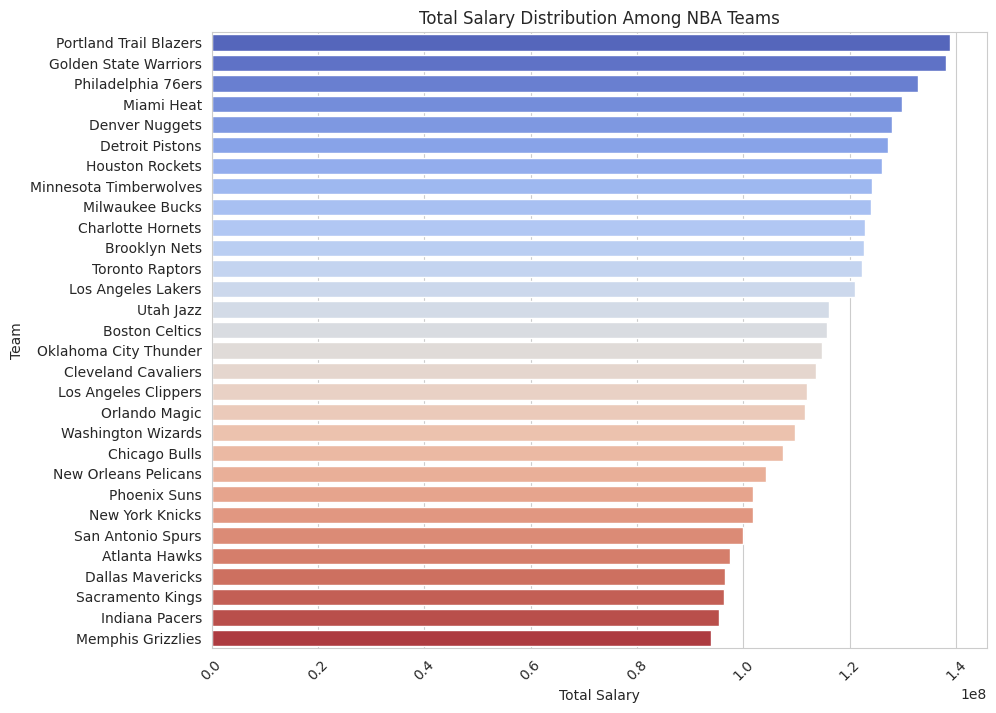

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate total salary by team
team_salary = (
    nba
    .groupby('Team')['Salary']
    .sum()
    .reset_index()
    .sort_values(by='Salary', ascending=False)
)

# Plot total salary by team
plt.figure(figsize=(10, 8))
sns.barplot(data = team_salary,
            x = 'Salary', y = 'Team',
            palette = 'coolwarm')
plt.title('Total Salary Distribution Among NBA Teams')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.xticks(rotation=45)
plt.show()


The visualization above displays the total salary distribution among NBA teams, with teams sorted by their total salary expenditure. This bar plot reveals which teams are the biggest spenders on player salaries and which are more conservative. The color gradient provides a visual cue to easily distinguish between the higher and lower spending teams. Portland Trail Blazers spent most in their players' salary, followed by Golden State Warriors and Philadelphia 76ers.


## Player Age Distribution

Next, let's explore the Player Age Distribution across the NBA. We'll create a histogram to visualize how player ages are distributed, which will help us understand if the league trends younger, older, or has a balanced age mix. ​​

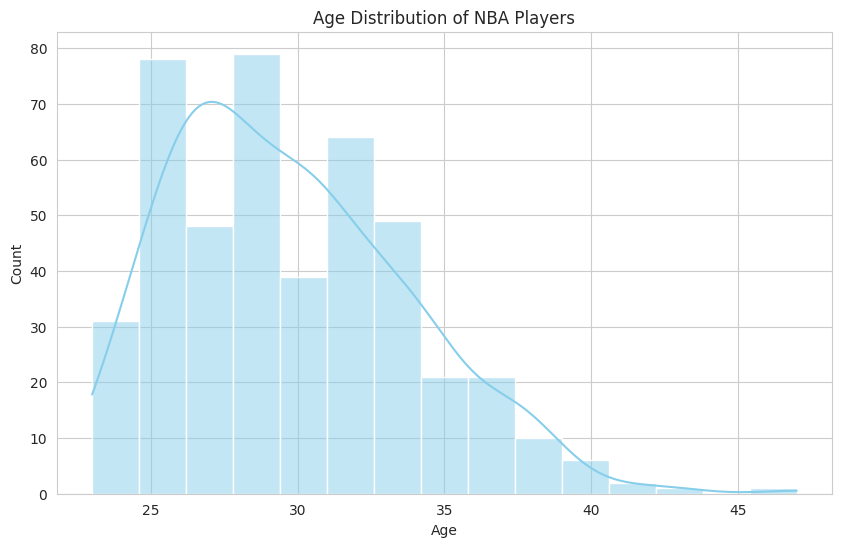

In [8]:
# Convert 'Birthday' column to datetime format
from dateutil import parser
nba['Birthday'] = nba['Birthday'].apply(lambda x: parser.parse(x))

# Now, let's calculate the age of each player
nba['Age'] = (datetime.now() - nba['Birthday']).dt.days // 365

# Plot the age distribution of NBA players
plt.figure(figsize=(10, 6))
sns.histplot(nba['Age'],
             bins = 15,
             kde = True,
             color = 'skyblue')
plt.title('Age Distribution of NBA Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



The histogram above shows the age distribution of NBA players, with a kernel density estimate (KDE) overlay to indicate the distribution shape. The majority of players fall within a certain age range from 25 to 35, illustrating the league's age dynamics. The plot helps identify the common ages for NBA players and whether there are significant numbers of very young or older players.



## Position-wise Salary Insights


Moving on to Position-wise Salary Insights, we'll examine how average salaries differ across player positions. This analysis could reveal which positions are typically higher-paid, potentially reflecting their value on the basketball court. Let's create a box plot to visualize the salary distribution for each position. ​​


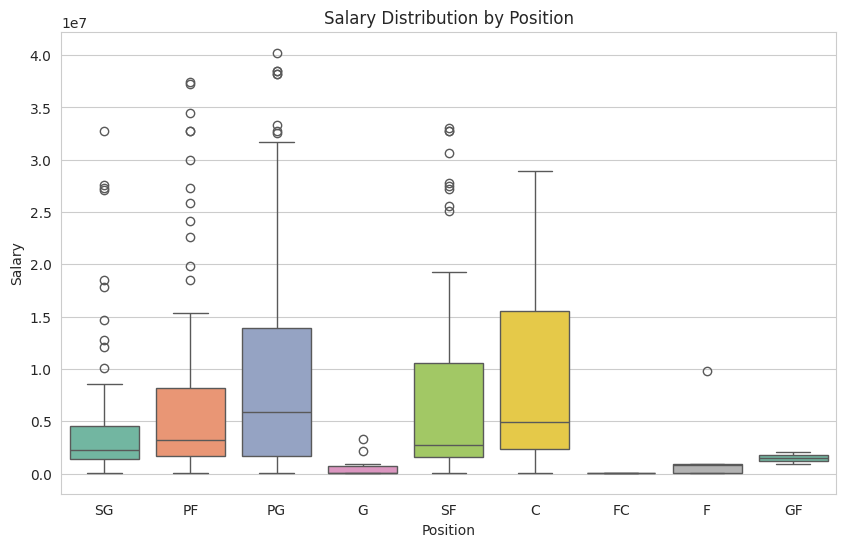

In [9]:
# Plot salary distribution by player position
plt.figure(figsize=(10, 6))
sns.boxplot(data = nba,
            x = 'Position', y = 'Salary',
            palette = 'Set2')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


The box plot above illustrates the salary distribution by player position, showcasing the variation in salaries among different positions within the NBA. This visualization helps us understand which positions tend to have higher median salaries and the spread of salaries within each position, including outliers that represent exceptionally high or low salaries. While the positions of C and PG have the widest interquantiles of salaries, the positions of FC, F, G, and GF have the narrowest interquantiles of them.



## Top 10 Highest Paid Players

Lastly, we'll identify the Top 10 Highest Paid Players in the NBA. This analysis highlights the star earners of the league, providing insights into which players command the highest salaries and potentially why. Let's extract and visualize this information. ​​


<ipython-input-10-c5df85e5f2b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_salaries,


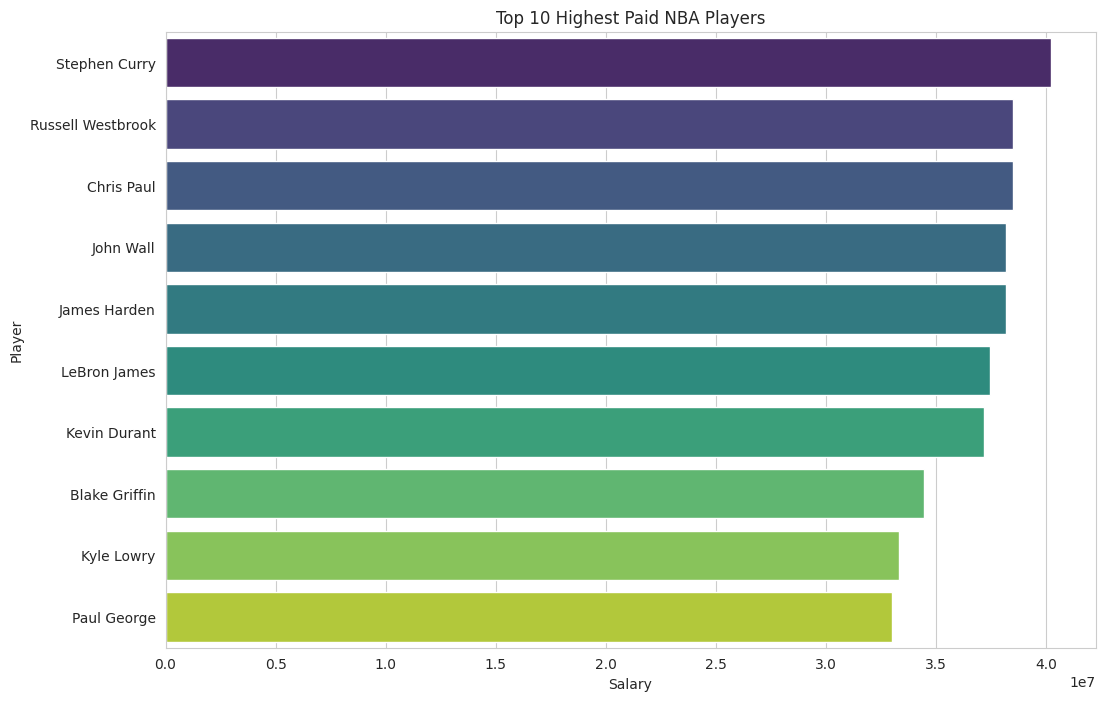

In [10]:
# Identify the top 10 highest paid players
top_10_salaries = nba.sort_values(by='Salary', ascending=False).head(10)

# Plot the top 10 highest paid players
plt.figure(figsize=(12, 8))
sns.barplot(data = top_10_salaries,
            x = 'Salary', y = 'Name',
            palette = 'viridis')
plt.title('Top 10 Highest Paid NBA Players')
plt.xlabel('Salary')
plt.ylabel('Player')
plt.show()


The bar chart above reveals the top 10 highest-paid NBA players, showcasing those who stand at the pinnacle of the league in terms of salary. Stephen Curry is the highest-paid NBA player, followed by Russel Westbrook and Chris Paul. This visualization not only highlights the star players who command the highest salaries but also may reflect their marketability, performance, and contribution to their respective teams.